# Titanic Data Analysis Practice

A first look at data analysis using Python. 

### Guided by a tutorial by [Ken Jee](https://www.youtube.com/watch?v=I3FBJdiExcg&list=LL&index=5&t=1356s). His notebook can be found [here](https://www.kaggle.com/kenjee/titanic-project-example).


## Goals:
- Analyze and visualize existing data regarding passengers of the RMS Titanic
- Use existing data to predict if a given person survived the RMS Titanic disaster
- Explore and practice using tools that data scientists employ

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



## Import the Data

Import the data provided by [Kaggle](https://www.kaggle.com/c/titanic). 

There are two CSV files:
- train.csv contains information on 891 passengers and indicates whether or not they survived. This is also referred to as the 'ground truth'.
- test.csv contains information on 418 passengers but does not indicate if they survived. This data is used to test any predictive models that are created.



The following table provides definitions for the variables:

| Variable | Definition                                  | Key                                            |
|:----------|:---------------------------------------------|:------------------------------------------------|
| survival | Whether or not a person survived            | 0 = No, 1 = Yes                                |
|Name| Name of passenger in the format 'Last, Title First (Maiden Name)' |                                |
| pclass   | Ticket Class                                | 1 = 1st class, 2 = 2nd class, 3 = 3rd class    |
| sex      | Sex                                         | 'male' or 'female'                             |
| Age      | Age in years (fractional if younger than 1) |                                                |
| sibsp    | # of siblings or spouses aboard the Titanic |                                                |
| parch    | # of parents or children aboard the Titanic |                                                |
| ticket   | Ticket ID/number                            |                                                |
| fare     | Passenger Fare paid                         |                                                |
| cabin    | Cabin number                                |                                                |
| embarked | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton |




Our dependent variable is whether or not a person survived.

In [2]:
# import the data
training = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')


In [3]:
# combine the data into a single dataset
# - create an additional column train_test that indicates if data in a row is training data (1) or test data (0) (bool-like)
# - create an additional column in test.csv 'Survived' to match training.csv, but make value NaN
# - combine the data into a single data set all_data

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training, test])

all_data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## Project Planning

### Become familiar with the data:
- Use .info() and .describe()
- Histograms and box plots (numerical data)
- Value counts (categorical data)

### Clean up data
- Evaluate any missing data
    - Remove or impute (estimate) the missing data
    
### Analysis
- Investigate potential themes emerging in data - potential correlations between passenger traits and survival
    - Gender
    - Ticket price 
    - Location on ship
    - Combinations of traits - Gender, age, and ticket price?
    - Potentially irrelevant data - PassengerID, etc
    
### Preprocess Data
This is a **classification** problem - we are attempting to determine if a person survived (1) or did not survive (0) the Titantic disaster.
- Feature engineering - pick out most relevant variables and/or create additional variables
- Prepare data for training and testing 
- Apply data scaling?

### Model Building
- Model baseline
- Model comparison with CSV


In [4]:
# Light Data Exploration
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [5]:
# look at data types and any null values
training.info()

# note there are null values in: Age, Cabin, and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# look at numeric data
training.describe()

# training.describe(include='all')

# gives insight into central tendencies of the data.
# ex. average age ~29-30 years old, average fare 32.20

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
# separate the numeric columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

## Numerical Data Analysis

In [8]:
# break data into numerical and categorical subsets for evaluation
# we omit irrelevant data like PassengerID 

train_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

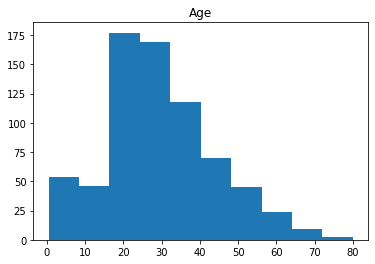

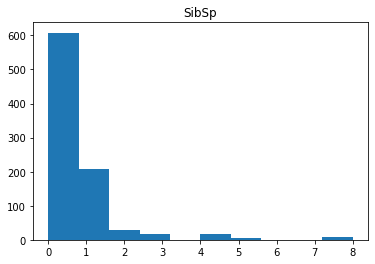

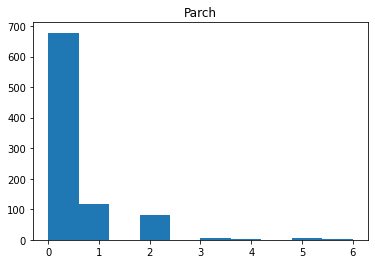

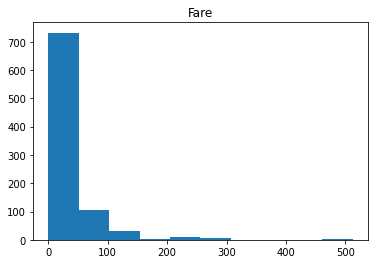

In [9]:
# iterate over numerical variables and describe with histograms

for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()
   


### From these graphs...

- We may want to normalize Fare, because so many people paid less than 100 for their ticket it would be interesting to see if it follows a slightly more normal distribution when normalized
- Age follows a rough normal curve already

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

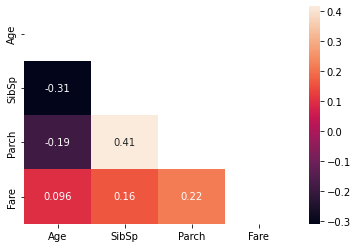

In [10]:
# now look at correlations in numerical data

# print a matrix of the correlations
print(train_num.corr())

# create a mask to hide diagonal + above - diagonals have a 1.00 correlation (same variable)
# and the upper values are a repeat of the lower values
mask = np.zeros_like(train_num.corr())
mask[np.triu_indices_from(mask)] = True

# print the heatmap with the values annotated and the mask applied
sns.heatmap(train_num.corr(), annot=True, mask=mask)

### From this graph...

- Spouse/siblings and parent/child are positively correlated - families tend to travel together?
- Age and # of siblings/spouses negatively correlated - more likely to travel with siblings if younger?

In [11]:
# compare surival rates across the numerical data
pd.pivot_table(training, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### From this table...
- Average age is roughly the same (~ 2 year difference), slightly lower age for survivors
- Average fare paid is **twice** as high for survivors
- Having parents/children slightly higher for survivors
- Having siblings/spouses slightly lower for survivors

## Categorical Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Ticket    891 non-null    object
 4   Cabin     204 non-null    object
 5   Embarked  889 non-null    object
dtypes: int64(2), object(4)
memory usage: 41.9+ KB


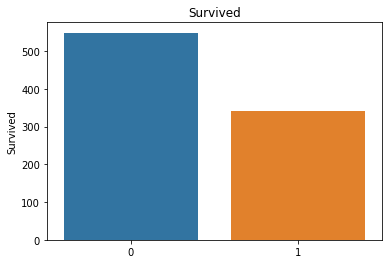

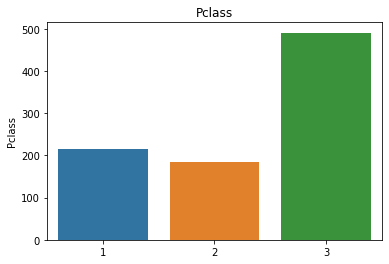

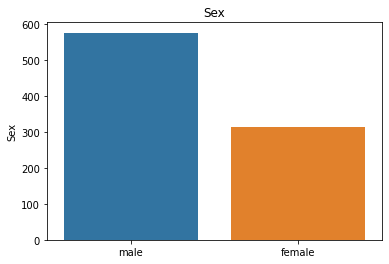

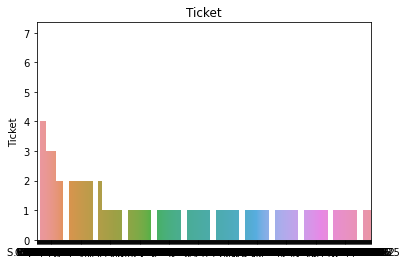

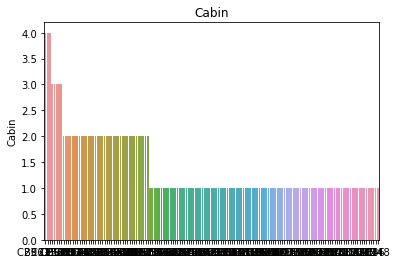

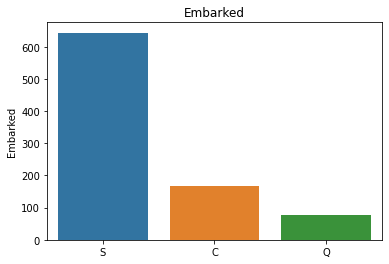

In [12]:
train_cat.info()
train_cat['Survived'].value_counts()

   
    
for i in train_cat.columns:
    sns.barplot(x=train_cat[i].value_counts().index, y=train_cat[i].value_counts()).set_title(i)
    plt.show()

### From these graphs...
- More people died than survived
- Most people were 3rd class
- Almost twice as many male as female passengers
- Need to process ticket and cabin data more (too many individual categories to represent properly here)
    - This is where feature engineering comes in handy
-  Majority of people embarked from Southampton

In [13]:
# now compare survival rates to these categorical variables

# notes on pivot table:
# - aggfunc indicates the calculation (in this case we want a count of values, as opposed to an average)
# - for values, select a column that has all non-null values to ensure we count for all passengers
#    - ex. 'cabin' has 204 non-null values so don't pick this column
#    - ex. 'name' and 'ticket' all have 0 non-null values so these are good columns to pick


print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print('\n===========\n')
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print('\n===========\n')
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### From these charts...
- More survivors from first class than second or third class - likely important variable
- More women survived than men - likely important variable
- Slightly more survivors (proportionally) from Cherbourg

## Feature Engineering

We can process some of the categorical data above a little more to better understand trends, and create additional variables to evaluate.


1. Cabin - Simplify this data and evaluate if the letter of the cabin or the purchase of multiple cabins impacts survival
2. Tickets - Evaluate if different ticket types impacts survival
3. New variable - Evaluate is a person's title (contained within 'Name') impacts survival

In [14]:
# look at cabin data for passengers
train_cat.Cabin

# create a new column cabin_multiple
# remove NaN values and count as 0 cabins. otherwise count the number of cabins a person owns (based on string spacing)
# so 0 = no cabins owned, 1 = 1 cabin owned, 4 = 4 cabins owned, etc

training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
pd.pivot_table(training, index='Survived', columns = 'cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


### From this chart...
- Much more likely to survive if at least one cabin is owned (similar to higher Fare paid)

In [16]:
# create categories based on the first letter of the cabin string (this letter may indicate where a cabin is located)
# n = null (treat no cabin as it's own category)

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

print(training.cabin_adv.value_counts())

pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Ticket', aggfunc = 'count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### From this chart...
- Having an unclear/no cabin identifier may indicate lower survival likelihood
- Having a clear cabin (particularly B, D, E) may indicate higher survival likelihood
- We can likely use the cabin letter as an additional categorical value

In [17]:
# a lot of ticket values are unique, but some are numeric and some are non-numeric
# numeric vs. non-numeric tickets may indicate cost or position on ship - evaluate

# split out numeric tickets
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

# split out non-numeric tickets, split along spaces, remove punctuation, make lowercase for easier grouping of similar ticket names
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [18]:
# view all of the unique lettered tickets

pd.set_option('max_rows', None) # for displaying all values

training['ticket_letters'].value_counts()


# more research may be needed to explore what these ticket values or strings actually mean

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [19]:
# numeric vs non-numeric ticket survival rates


pd.pivot_table(training, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


### From this chart...
- The ratio of survival for numeric ticket holders and non-numeric ticket holders is very similar
- Numeric vs non-numeric ticket may not be a strong indication of chance of survival

In [20]:
# non-numeric ticket survival rates

pd.pivot_table(training, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### From this chart...
- No particular ticket string/descriptor seems to be a strong indicator for chance of survival

In [21]:
# feature engineering
# create a new feature - person's title, which is contained within person's name column

training.Name.head(50)

# for each name - split along commas, take the second string, split among periods, take the first string, and remove whitespace
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [23]:
pd.pivot_table(training, index='Survived', columns='name_title', values='Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


## Data Preprocessing for Model

Let's clean up data prior to creating a predictive model.

1. Drop null values for embarked (only 2 null values exist)
2. Only include relevant variables
    - Drop irrelevant variables such as passengerID and Name
    - Include: Pclass, Sex, Age, Sibsp, Parch, Fare, Embarked, cabin_adv, cabin_multiple, numeric_ticket, name_title 
3. Perform categorical transformations on the test data, as we did above for the training data. We want to make sure our training and test data have the same columns.
    - When doing machine learning, it is generally recommended to use ['one-hot encoding'](https://en.wikipedia.org/wiki/One-hot) instead for categorical data.
    - This means using binary input/outputs for categorical data - this can prevent the machine learning algorithm from weighing variables differently when they should be equal weight. 
    - Pandas.get_dummies() method may be useful for converting to one-hot encoding.
4. Impute the data with mean for fare and age
5. Normalize fare using logarithm to make more normal distribution
6. Scale data from 0-1 with standard scaler


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [25]:
# create the same categorical variables as we did above for all data (training and testing)
# formulas are the same as above but now applied to all_data dataframe

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


# for continuous data, impute nulls - replace any null values with the average value from our training set
# consideration - use median for fare ILO mean, as it is not normally distributed
all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.mean())


# drop null values for embarked - only 2 present in training, 0 present in test
all_data.dropna(subset=['Embarked'], inplace=True)


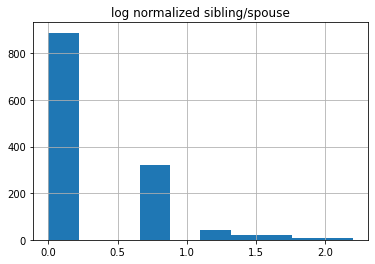

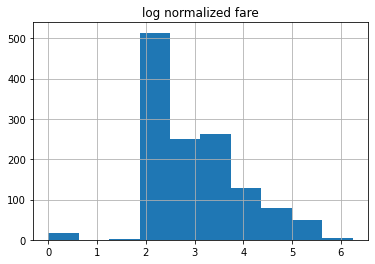

In [26]:
# attempt log normalizations and see if they are useful
# remember - +1 is due to log(0) is undefined


# log normalize sibsp
# do not use - not a useful normalization (as expected)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist().set_title('log normalized sibling/spouse')
plt.show()

# log normalize fare
# use this - this is a useful representation of the fare
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist().set_title('log normalized fare')
plt.show()

In [27]:
# convert fare to category for pd.get_dummies() - string now, not int64
all_data.Pclass = all_data.Pclass.astype(str)

# create dummy variables from categories (can also use One Hot Encoder)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', 'train_test']])


# split into train and test again
# training and testing independent variables
x_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1) 
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

# training dependent variables
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [28]:
# Scale data 

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

## Model Building - Baseline Validation Performance

Let's build some models and evaluate them against our provided train data to see how well they might perform on our test data.

We are using [5 fold cross validation](https://machinelearningmastery.com/k-fold-cross-validation/) to get a baseline of how our models perform. This randomly samples from our training data, trains the model, and then evaluates the model results against the remaining training data. With a baseline, we will be able to see how much tuning improves each model. 

Though note that a model having a high baseline on this validation set does not necessarily indicate it will do better on the test data. Doing well compared to training data may indicate the model is slightly overtrained.

[Scikit Cross Validation Function](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

Models to build and evaluate:
- Naive Bayes
- Logistic Regression
- Decision Tree
- K Nearest Neighbor
- Random Forest
- Support Vector Classifier
- Xtreme Gradient Boosting
- Soft Voting Classifier





In [29]:
# import required packages for models
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Naive Bayes Model
A very simple model and potentially a good baseline.

Naive Bayes is used for categorical data. Gaussian Naive Bayes is for continuous data.


[Naive Bayes information](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

[Gaussian Naive Bayes information](https://iq.opengenus.org/gaussian-naive-bayes/)

In [30]:
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.722 accuracy with a standard deviation of 0.03


## Logistic Regression Model
Logistic regression - unscaled and scaled

In [31]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.821 accuracy with a standard deviation of 0.02


In [32]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train_scaled,y_train,cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.821 accuracy with a standard deviation of 0.02


## Decision Tree


In [33]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.74719101 0.74157303 0.80898876 0.75842697 0.82485876]
0.776 accuracy with a standard deviation of 0.03


In [34]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
0.774 accuracy with a standard deviation of 0.03


## K Nearest Neighbor


In [35]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.76966292 0.80898876 0.80337079 0.81460674 0.83615819]
0.807 accuracy with a standard deviation of 0.02


In [36]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.816 accuracy with a standard deviation of 0.02


## Random Forest


In [37]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, x_train, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
0.807 accuracy with a standard deviation of 0.04


In [38]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
0.805 accuracy with a standard deviation of 0.04


## Support Vector Classifier


In [39]:
svc = SVC(probability = True)
cv = cross_val_score(svc, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.832 accuracy with a standard deviation of 0.02


## Xtreme Gradient Boosting


In [40]:
# may need to install xgboost
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
0.818 accuracy with a standard deviation of 0.02


## Soft Voting Classifier

A voting classifier uses several models at once, and then those models 'vote' on whether or not a given person survived.
Hard voting means that each model assigns a YES or NO vote, and then the majority determines the result (better for odd numbers of models, otherwise a tie may occur). Soft voting means averaging the confidence of the models and taking the result of that average.

Example: for a given person, logistic regression predicts 100% chance of survival, KNN predicts 30% chance of survival, random forest predicts 40% chance of survival.

Hard voting says this person **does not** survive (1 YES vote, 2 NO votes)<br>
Soft voting says this person **does** survive (average of 100, 30, and 40 is 56.6 > 50%)

In [41]:
from sklearn.ensemble import VotingClassifier

voting_clf_soft = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf_soft, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.80337079 0.81460674 0.8258427  0.79775281 0.83615819]
0.816 accuracy with a standard deviation of 0.01


In [42]:
voting_clf_hard = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'hard') 
cv = cross_val_score(voting_clf_hard, x_train_scaled, y_train, cv=5)

# array of scores of accuracy for each group (5 total)
print(cv)

# mean value of the scores for all groups
print("%0.3f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.83146067 0.80898876 0.83707865 0.79775281 0.85310734]
0.826 accuracy with a standard deviation of 0.02


## Model Tuned Performance

Now that we have our baseline models, we can investigate if models can be tuned for better performance. Here we will be using GridSearch and Randomized Search to tune models.


| Model                     | Baseline | Tuned Performance |
|---------------------------|----------|-------------------|
| Naive Bayes               | 72.2%    | N/A               |
| Logistic Regression       | 82.1%    | 82.6%               |
| Decision Tree             | 77.6%    | N/A               |
| K Nearest Neighbors       | 81.6%    | 83.0%               |
| Random Forest             | 80.7%    | **83.4%**               |
| Support Vector Classifier | **83.2%**    | 83.2%               |


In [43]:
# import relevant modules
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [44]:
# a function that will help report tuning information
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best score: ' + str(classifier.best_score_))
    print('Best parameters: ' + str(classifier.best_params_))

In [45]:
# logistic regression tuning
lr = LogisticRegression()

# input parameters to test
param_grid = {'max_iter' : [2000],
             'penalty' : ['l1', 'l2'], 
             'C' : np.logspace(-4, 4, 20), 
             'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

# return the best parameters that fit this data
best_clf_lr = clf_lr.fit(x_train_scaled, y_train)

clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best score: 0.8268075922046594
Best parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3, 5, 7, 9], 
             'weights' : ['uniform', 'distance'], 
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'], 
             'p' : [1, 2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x_train_scaled, y_train)
clf_performance(best_clf_knn, 'K Next Neighbors')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
K Next Neighbors
Best score: 0.8301720307243065
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [47]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best score: 0.8324319177299563
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [48]:
# the feature space for random forest is large. Use a randomized search to narrow down parameters for the model.
# take the best model from these parameters and then do a more granular search.

rf = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators' : [100, 500, 1000], 
             'bootstrap' : [True, False], 
             'max_depth' : [3, 5, 10, 20, 50, 75, 100, None], 
             'max_features' : ['auto', 'sqrt'], 
             'min_samples_leaf' : [1, 2, 4, 10], 
             'min_samples_split' : [2, 5, 10]}


#randomizedSearch will use 100 randomized values from the param grid above
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)

# return the best parameters for our data from the randomized search
best_clf_rf_rnd = clf_rf_rnd.fit(x_train_scaled, y_train)
clf_performance(best_clf_rf_rnd, 'Random Forest (with Randomized Search)')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest (with Randomized Search)
Best score: 0.8335301212467467
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


In [49]:
# now do a more granular parameter search using results from the randomized search above

rf = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators' : [50, 100, 150, 200], 
             'criterion' : ['gini', 'entropy'], 
             'bootstrap' : [True], 
             'max_depth' : [15, 20, 25], 
             'max_features' : ['auto', 'sqrt', 10], 
             'min_samples_leaf' : [2, 3], 
             'min_samples_split' : [2, 3]}


clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

# return the best parameters for our data from the granular search
best_clf_rf = clf_rf.fit(x_train_scaled, y_train)
clf_performance(best_clf_rf_rnd, 'Random Forest (granular search)')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest (granular search)
Best score: 0.8335301212467467
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


Text(0.5, 1.0, 'Impact of Features on Model')

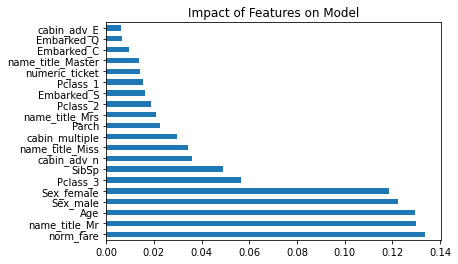

In [50]:
# which features have largest impact on the random forest model?
# may help to identify confounding variables for removal - ex. embarked location

best_rf = best_clf_rf.best_estimator_.fit(x_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=x_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh').set_title('Impact of Features on Model')

## Model Additional Ensemble Approaches


Hard Voting Classifier of 3 estimators (KNN, SVC, RF) - 81.7%

Soft Voting Classifier of 3 estimators (KNN, SVC, RF) - 82.2%

Soft Voting Classifiers of all estimators (KNN, SVC, RF, LR) - **82.6%**

In [51]:
# take the best version of each model

best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_

In [52]:
voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 

In [53]:
print('voting_clf_hard :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,x_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,x_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,x_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,x_train,y_train,cv=5).mean())


voting_clf_hard : [0.79775281 0.81460674 0.83146067 0.80898876 0.83615819]
voting_clf_hard mean : 0.8177934361708881
voting_clf_soft : [0.78651685 0.8258427  0.8258427  0.81460674 0.85875706]
voting_clf_soft mean : 0.8223132101821875
voting_clf_all : [0.80898876 0.8258427  0.82022472 0.81460674 0.86440678]
voting_clf_all mean : 0.8268139402018664


In [54]:
#in a soft voting classifier you can weight some models more than others.
# use a grid search to explore different weightings

params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(x_train_scaled,y_train)


clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(x_test_scaled)

# the best weighting is [1, 1, 1], so no difference from before

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best score: 0.831321018218752
Best parameters: {'weights': [2, 1, 2]}


# Creating Predictions

Using a chosen model, predict survival on the test data and output to a file that can be submitted for the competition.

The model I am going to use is the Soft Voting Classifier for All Tuned Models (KNN, SVC, RF, LR)  -- voting_clf_all

In [55]:
# model
voting_clf_all.fit(x_train_scaled, y_train)

# input test data and cast as an int
y_hat_vc_all = voting_clf_all.predict(x_test_scaled).astype(int)

In [56]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission = pd.DataFrame(data=final_data)

In [57]:
#prepare submission files 
submission.to_csv('submission.csv', index =False)

In [58]:
submission['Survived'].value_counts()

# predicting that out of the remaining 418 passengers, 156 survived
# accuracy of submission = 78.468%, top 15% of submissions

0    262
1    156
Name: Survived, dtype: int64